# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1 - A simple cost function
### $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x +  1

In [3]:
# Make data
x_1 = np.linspace(start=-3, stop=3, num=500)
x_1 #Generates an array of 100 indices, evenly spaced numbers from -3 to +3. 

array([-3.        , -2.98797595, -2.9759519 , -2.96392786, -2.95190381,
       -2.93987976, -2.92785571, -2.91583166, -2.90380762, -2.89178357,
       -2.87975952, -2.86773547, -2.85571142, -2.84368737, -2.83166333,
       -2.81963928, -2.80761523, -2.79559118, -2.78356713, -2.77154309,
       -2.75951904, -2.74749499, -2.73547094, -2.72344689, -2.71142285,
       -2.6993988 , -2.68737475, -2.6753507 , -2.66332665, -2.65130261,
       -2.63927856, -2.62725451, -2.61523046, -2.60320641, -2.59118236,
       -2.57915832, -2.56713427, -2.55511022, -2.54308617, -2.53106212,
       -2.51903808, -2.50701403, -2.49498998, -2.48296593, -2.47094188,
       -2.45891784, -2.44689379, -2.43486974, -2.42284569, -2.41082164,
       -2.3987976 , -2.38677355, -2.3747495 , -2.36272545, -2.3507014 ,
       -2.33867735, -2.32665331, -2.31462926, -2.30260521, -2.29058116,
       -2.27855711, -2.26653307, -2.25450902, -2.24248497, -2.23046092,
       -2.21843687, -2.20641283, -2.19438878, -2.18236473, -2.17

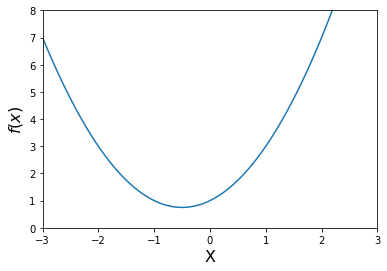

In [4]:
#plot y=f(x_1)
plt.xlim(-3, 3) #also plt.xlim([-3,3])
plt.ylim(0, 8) #also plt.ylim([0,8])
plt.xlabel('X', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### Find the value of 'x' that minimizes '$f(x)$'
#### The steeper the slope, the faster the rate of decreasing or increasing of a particular value

 ### Creation of a python function for the derivative of '$f(x)$'

In [5]:
def df(x):
    return 2*x + 1

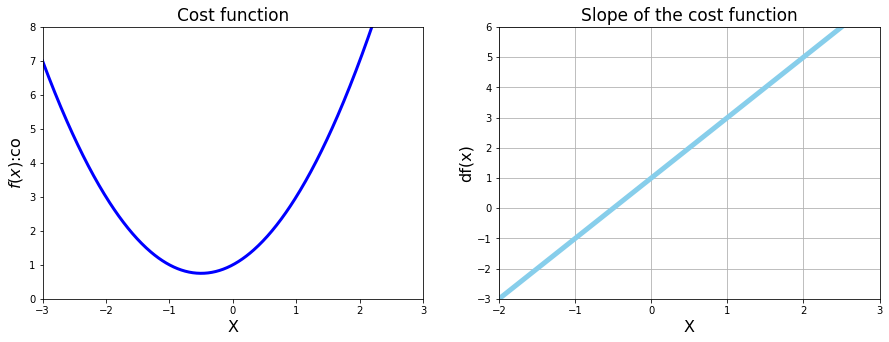

In [6]:
#plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3) #also plt.xlim([-3,3])
plt.ylim(0, 8) #also plt.ylim([0,8])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('$f(x)$:co', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)


plt.show()

### Plot the graphs in different rows and in a same column

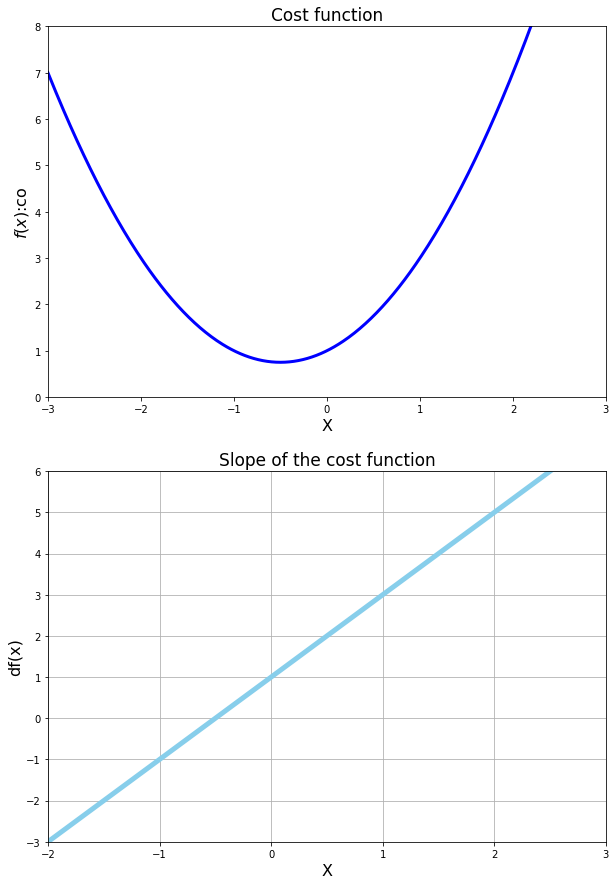

In [7]:
#plot function and derivative same column

plt.figure(figsize=[10, 15])

# 1 Chart: Cost function
plt.subplot(2, 1, 1)

plt.xlim(-3, 3) #also plt.xlim([-3,3])
plt.ylim(0, 8) #also plt.ylim([0,8])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('$f(x)$:co', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

#2 Chart: Derivative
plt.subplot(2,1,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)


plt.show()

## Python Loops & Gradient Descent

In [8]:
#Python For Loop
for n in range(5):
    print('Hello world', n)
print('End of loop')

Hello world 0
Hello world 1
Hello world 2
Hello world 3
Hello world 4
End of loop


In [9]:
#Python while loop
counter = 0
while counter<7:
    print('Counting ...', counter)
    counter+=1
print('Ready or not, here I come')

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Ready or not, here I come


In [10]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
for n in range(35):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
print('Local minimum  occurs at:', new_x)
print('Slope of df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Local minimum  occurs at: -0.49858023132774437
Slope of df(x) value at this point is: 0.002839537344511256
f(x) value or cost at this point is: 0.7500020157430827


### Adding Precision Value

In [11]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    #print(step_size)
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum  occurs at:', new_x)
print('Slope of df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum  occurs at: -0.49996003706460423
Slope of df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


### Plotting a Graph

In [12]:
# Gradient Descent 
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum  occurs at:', new_x)
print('Slope of df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum  occurs at: -0.49996003706460423
Slope of df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


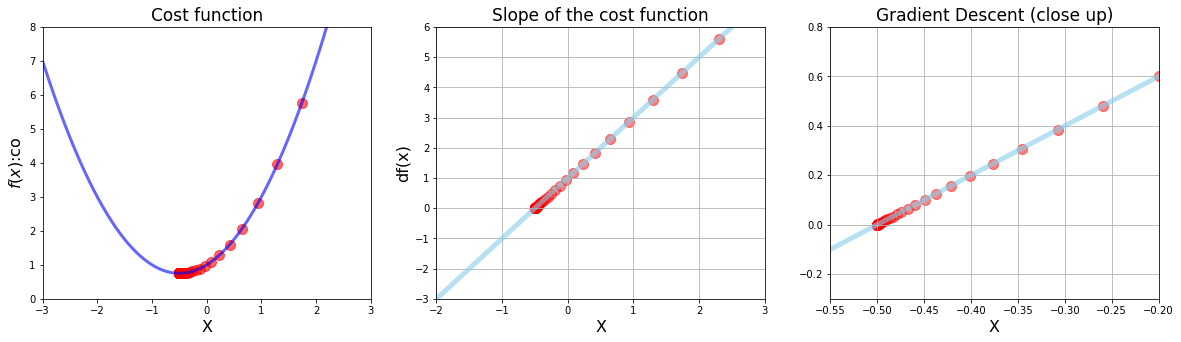

In [13]:
# Superimpose the Gradient Descent calculation on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3) #also plt.xlim([-3,3])
plt.ylim(0, 8) #also plt.ylim([0,8])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('$f(x)$:co', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.6)

#We convert a 'List' into an array, so that it fits in a a function argument. 
values = np.array(x_list) #converted the list into an array
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6) #if i write f(x_list) here, it wouldn't work because a function can't process a list arg.

#2 Chart: Derivative
plt.subplot(1,3,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

#2 Chart: Derivative (Close up)
plt.subplot(1,3,3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
# plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)



plt.show()

# Example 2- Multiple Minima vs Initial Guess & Advanced Functions
## $$g(x)= x^4 - 4x^2 + 5$$


In [14]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)
# Defining the g(x) function..
def g(x):
    return x**4 - 4*x**2 + 5
#defining the dg(x function)
def dg(x):
    return 4*x**3 - 8*x


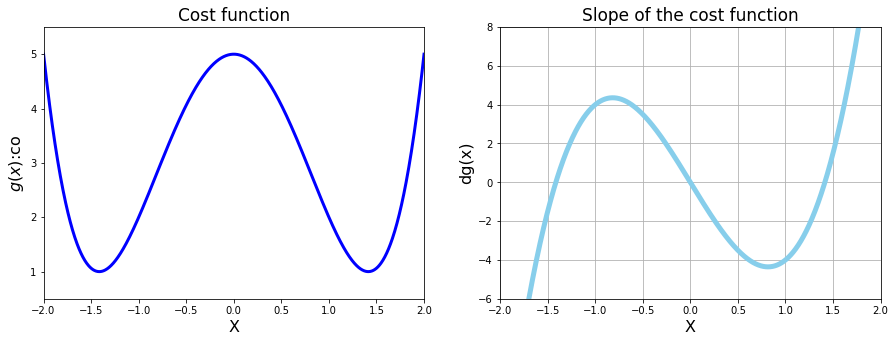

In [15]:
#plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2) #also plt.xlim([-3,3])
plt.ylim(0.5, 5.5) #also plt.ylim([0,8])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('$g(x)$:co', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)


plt.show()

## Gradient Descent as a Python Function

In [16]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,  max_iter=300):
    #auto indent: ctrl + ] or cmd + ]
    new_x = initial_guess 
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x) 
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        if step_size < precision:
            break
    
    return new_x, x_list, slope_list

In [17]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, multiplier=0.01, precision=0.0001 )
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [18]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1 )
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


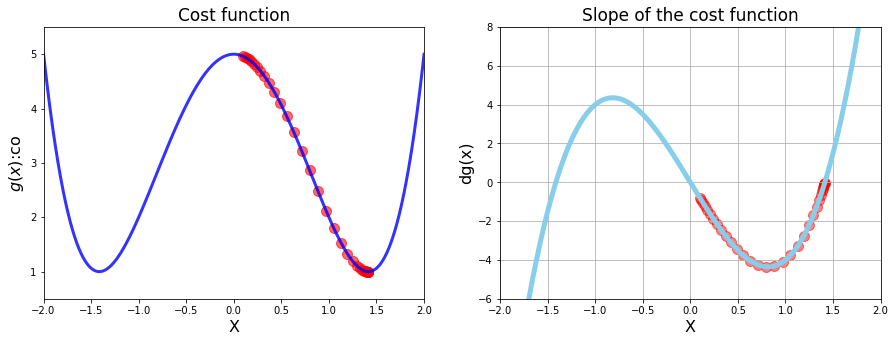

In [19]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0.1)
# Plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2) #also plt.xlim([-3,3])
plt.ylim(0.5, 5.5) #also plt.ylim([0,8])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('$g(x)$:co', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)
#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence, Overflow, and Python Tuples
### $$h(x) = x^5 - 2x^4+2$$

In [20]:
# Make Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3


     

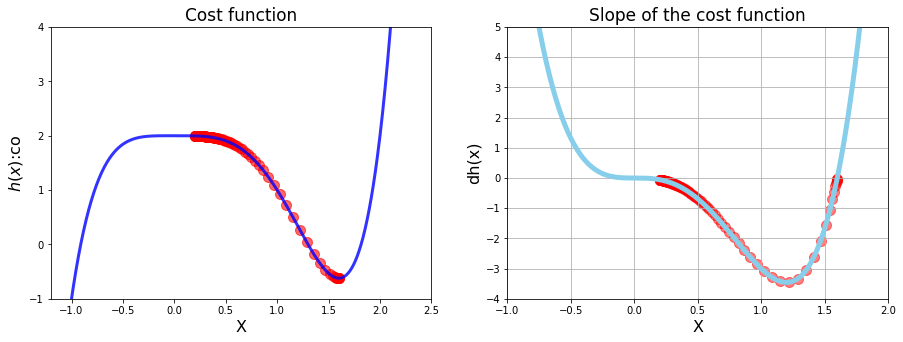

Local min: 1.5989534547394717
Cost at this min is: -0.6214287992331258
Number of loops: 117


In [21]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= 0.2)
# Plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5) #also plt.xlim([-3,3])
plt.ylim(-1, 4) #also plt.ylim([0,8])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('$h(x)$:co', fontsize=16)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)
#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()
print('Local min:', local_min)
print('Cost at this min is:', h(local_min))
print('Number of loops:', len(list_x))

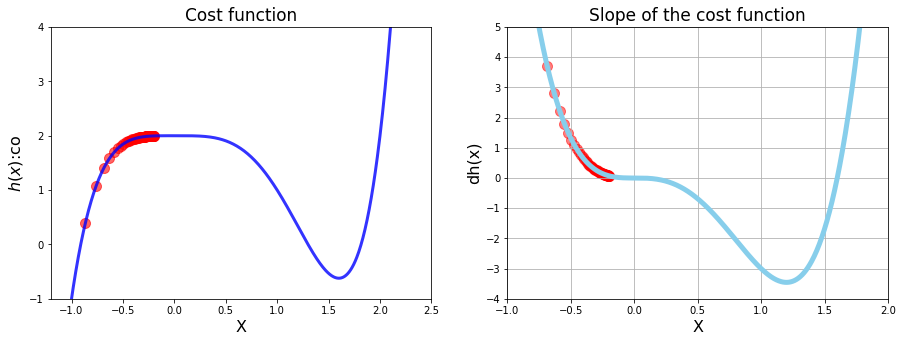

Local min: -2071072.4470816324
Cost at this min is: -3.810455326061589e+31
Number of loops: 71


In [22]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=70)
# Plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5) #also plt.xlim([-3,3])
plt.ylim(-1, 4) #also plt.ylim([0,8])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('$h(x)$:co', fontsize=16)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)
#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()
print('Local min:', local_min)
print('Cost at this min is:', h(local_min))
print('Number of loops:', len(list_x))

In [23]:
import sys
#help(sys)
#sys.version
#type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples
#### Tuples can contain heterogeneous data, lists can't || Tuples are immutable, lists are mutable 

In [24]:
# Creating a Tuple - Tuple Packing
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26,17

print('I loooooove', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[0]) +'th floor!')

not_my_address = 1, 'infinite Loop', 'Cupertino', 95014
tuple_with_single_value = 42,
type(tuple_with_single_value)
main, side, greens = breakfast
print('Main course is ' + main + '!')

I loooooove bacon
My hotel has no 13th floor!
Main course is bacon!


In [25]:
# Access to Tuples
# Contains local_min-0, list_x-1, deriv_list-2
data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


# The Learning Rate

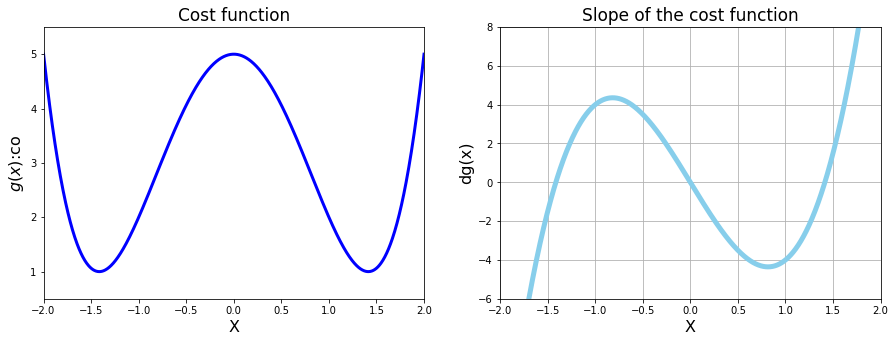

In [26]:
#plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2) #also plt.xlim([-3,3])
plt.ylim(0.5, 5.5) #also plt.ylim([0,8])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('$g(x)$:co', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)


plt.show()

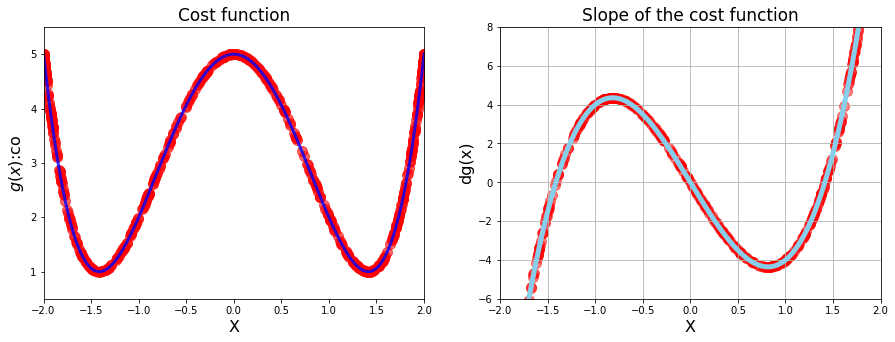

Number of steps: 501


In [27]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9, multiplier=0.25, max_iter=500)
# Plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2) #also plt.xlim([-3,3])
plt.ylim(0.5, 5.5) #also plt.ylim([0,8])
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('$g(x)$:co', fontsize=16)
plt.plot(x_2 , g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)
#2 Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()
print('Number of steps:', len(list_x))

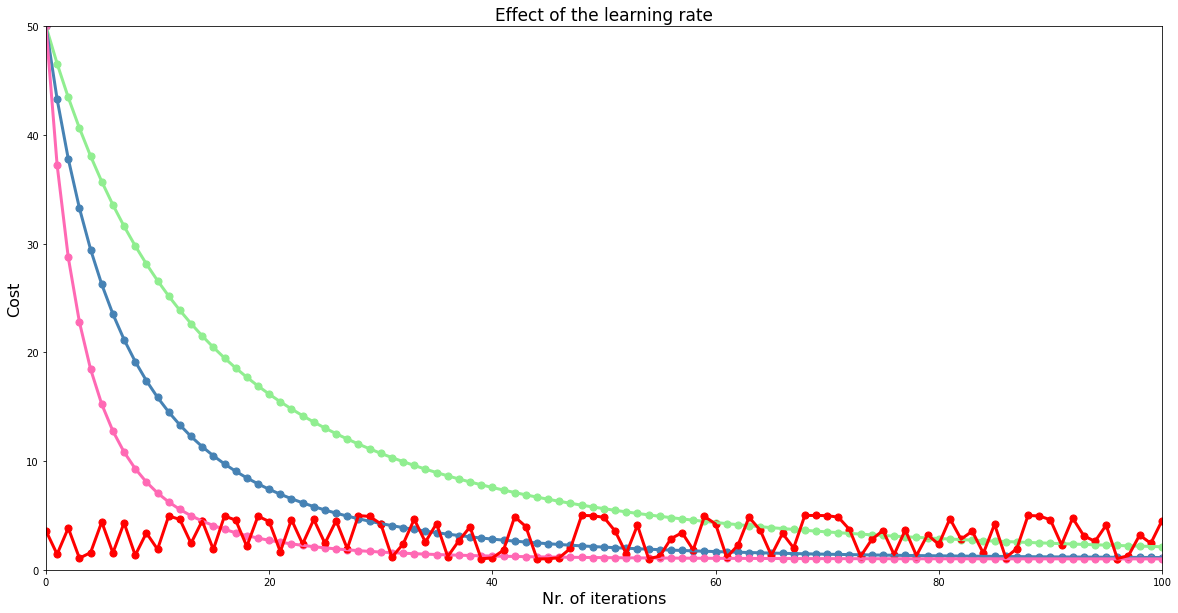

In [28]:
# Run gradient descent 3  function
n=100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, multiplier=0.0005, precision=0.0001, max_iter=n)
# low_gamma(local_min, list_x, deriv_list)

# Challenge: Plot two more learning rates: mid_gamma (0.001) and high_gamma(0.002)

# Mid Gamma
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)

# High Gamma
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier= 0.002, precision=0.0001, max_iter=100)

#Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier= 0.25, precision=0.0001, max_iter=100)

# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim(0, n) 
plt.ylim(0, 50) 

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr. of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: Convert the lists to numpy arrays
low_values = np.array(low_gamma[1]) #list_x in an array
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
#print(g(high_values)) 91 values
#print(g(mid_values)) 101 values
#print(g(low_values)) 101

# 2) X axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))
it= list(range(0, 91))
# Plotting low learning rate 
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=3) #x_list replaced by iter list
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=50)

# Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=3)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=50)

# Plotting high learning rate
plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=3)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=50)

# Plotting insane learning rate
# Plotting high learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=3)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=50)

plt.show()

# Example 4 - Data Viz with 3D Charts
## Minimise: $$Z = f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$
Minimize $$f(x, y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 - y^2}$ 

In [29]:
def fxy(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [30]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)
#type(x_4)
print('Shape of X array', x_4.shape)
#print(x_4)
x_4, y_4 = np.meshgrid(x_4, y_4) 
print('Array after meshgrid:', x_4.shape)
#print(y_4)
#print(x_4)

Shape of X array (200,)
Array after meshgrid: (200, 200)


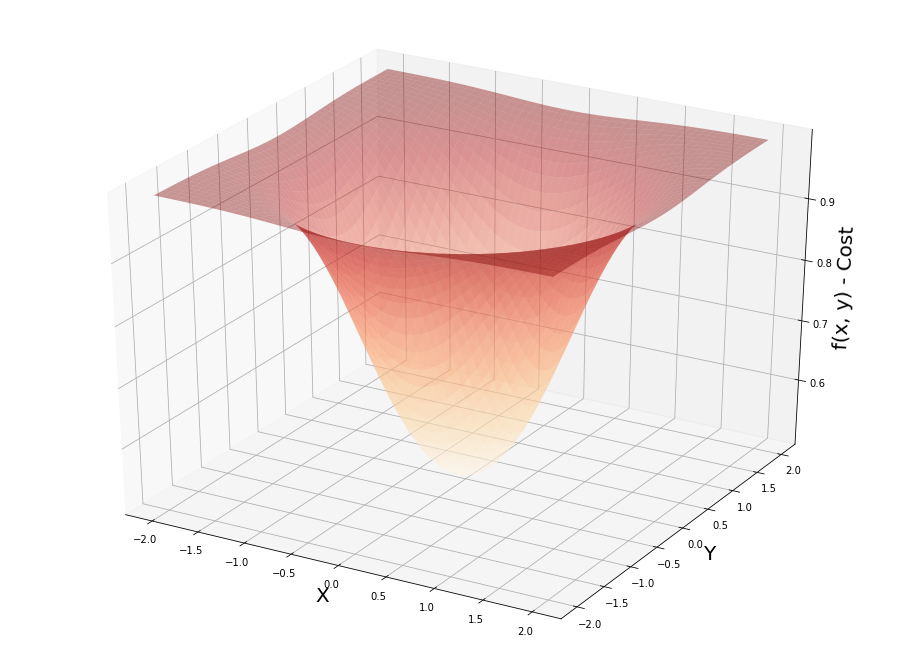

In [31]:
# Generating 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')#get current axis = gca

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, fxy(x_4, y_4), cmap=cm.OrRd, alpha=0.4) # plasma, coolwarm
plt.show()

## Partial Derivatives & Symbolic Computations
## $$\frac{\partial f}{\partial x} = \frac{2x \ln\left(3\right) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2}+1\right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln\left(3\right) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2}+1\right)^2}$$



In [32]:
a, b = symbols('x, y ')
print('Our cost function f(x, y) is: ', fxy(a, b))

print('Partial derivative wr to x is: ' , diff(fxy(a, b), a))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      fxy(a, b).evalf(subs={a:1.8, b:1.0})) #Python Dictionary a=key,1.8= value of key 'a' #cost function
print("Value of partial derivative wr to x is: ", diff(fxy(a, b), a).evalf(subs={a:1.8, b:1.0}))
diff(fxy(a, b), a)

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wr to x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wr to x is:  0.0368089716197505


2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

## Batch Gradient Descent with SymPy

In [33]:
# Setup
multiplier = 0.1
max_iter = 500 #try 200, try 1500
params = np.array([1.8, 1.0]) # initial guess 

for n in range(max_iter):
    gradient_x = diff(fxy(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(fxy(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y]) #assume 0.0033, 0.0044
    params = params - multiplier * gradients #1.8-0.0033, 1.0-0.0044

#Resuts
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ',fxy(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [34]:
# Partial derivative functions example 4
def fpx(x, y):
    r = 3 **(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3 **(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [35]:
# Setup
multiplier = 0.1
max_iter = 500 #try 200, try 1500
params = np.array([1.8, 1.0]) # initial guess 

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y]) #assume 0.0033, 0.0044
    params = params - multiplier * gradients #1.8-0.0033, 1.0-0.0044

#Resuts
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ',fxy(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [36]:
# Setup
multiplier = 0.1
max_iter = 500 #try 200, try 1500
params = np.array([1.8, 1.0]) # initial guess 
values_array = params.reshape(1, 2) #1 raw 2 columns
print(values_array.shape) 

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y]) #assume 0.0033, 0.0044
    params = params - multiplier * gradients #1.8-0.0033, 1.0-0.0044
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0) #use this method
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0) #or use this

#Resuts
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ',fxy(params[0], params[1]))

(1, 2)
Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


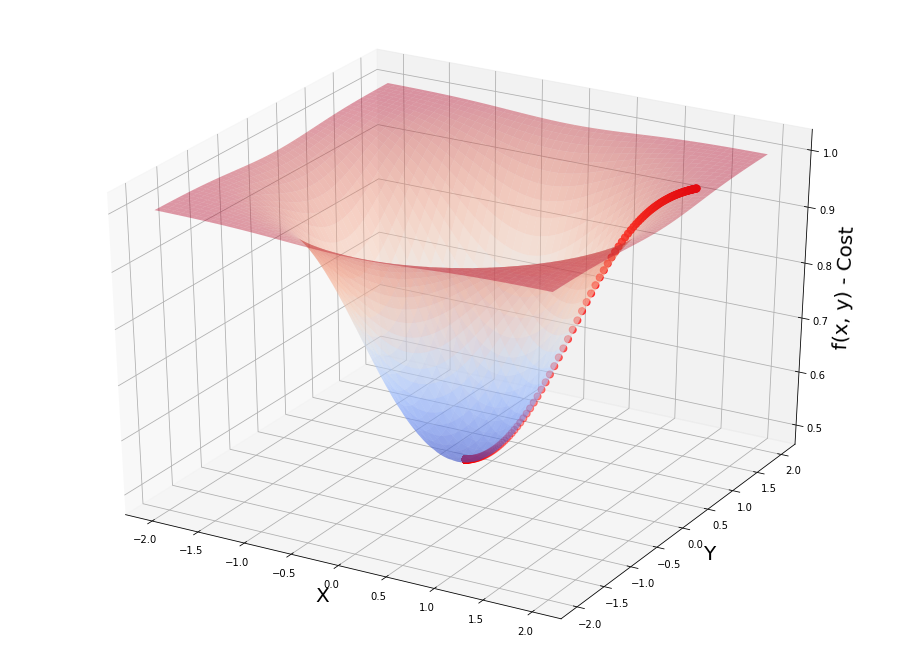

In [37]:
# Generating 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')#get current axis = gca

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)


ax.plot_surface(x_4, y_4, fxy(x_4, y_4), cmap=cm.coolwarm, alpha=0.4) # plasma, coolwarm, cm.OrRd
ax.scatter(values_array[:, 0], values_array[:, 1], 
           fxy(values_array[:, 0], values_array[:, 1]), s=50, color = 'red') #supply x_values

plt.show()

In [38]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']]) #1,2
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']]) #2,2

print(hs_band.shape)
print(hs_band[0][0])
print(kirk[0])

the_roots = np.append(arr=hs_band, values=kirk.reshape(2,1), axis=1) #axis0 represents, should add in row. 1 represents in col
print(the_roots)
the_roots_1 = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots_1)

print('Printing nicknames...', the_roots_1[:, 0]) #":" is a shorthand notation that says select all the rows.
the_roots_1 = np.append(arr = the_roots_1, values=[['Malik B', 'MC']], axis=0)
print('Printing band...', the_roots_1[:, 1])

(1, 2)
(2, 2)
Black Thought
['Captain' 'Guitar']
[['Black Thought' 'MC' 'Captain']
 ['Questlove' 'Drums' 'Guitar']]
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band... ['MC' 'Drums' 'Guitar' 'MC']


# Example 5 - Working with Data & a Real Cost Function
## Mean Squared Error: a cost function for regression problems
### $$RSS = \sum_{i=1}^n \big( y^{(i)} - h_\theta x^{(i)}\big)^2 $$
### $$MSE = \frac{1}{n}\sum_{i=1}^n \big( y^{(i)} - h_\theta x^{(i)}\big)^2 $$
### $$MSE = \frac{1}{n}\sum_{i=1}^n \big( y - \hat {y}\big)^2 $$

In [39]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array: ', x_5.shape)
print('Shape of y_5 array: ', y_5.shape)


Shape of x_5 array:  (7, 1)
Shape of y_5 array:  (7, 1)


In [40]:
# Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029554
Theta 1:  1.222726463783591


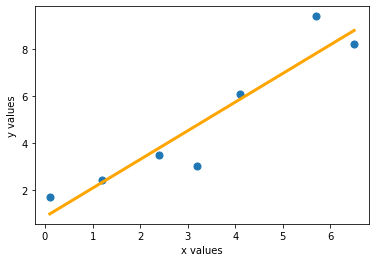

In [41]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [42]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029554 + 1.222726463783591*x_5
print('Est values y_hat are: \n', y_hat) 
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


# 1. Write a python $f^{n}$ mse(y, y_hat) returns the MSE. Call mse(y, y_hat)
# fn and print out the MSE for the y_hat calculated above.
len = x_5.size

def mse(y, y_hat):
    x=0
    for n in range(len):
        x = x + (y[n] - y_hat[n])**2     
    return x/len

print(mse(y_5, y_hat))
    

In [49]:
# Another Approach
def mse(y, y_hat):
    # mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [45]:
print('Manually calculated mse: ', mse(y_5, y_hat))
print('MSE regression using manual calc is: ', mean_squared_error(y_5, y_hat))
print('MSE regression is: ', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated mse:  [0.94796558]
MSE regression using manual calc is:  0.9479655759794575
MSE regression is:  0.9479655759794575


## 3D Plot for the MSE Cost Function
## Make data for thetas

In [89]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [90]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
for i in range(nr_thetas):
    for j in range(nr_thetas):
        # print(plot_t0[i][j]) # first row, second row, th.....
        # print(plot_t0[j][i]) # first col, second col, th.....
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat) 

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t0', plot_t1.shape)
print('Shape of plot_t0', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t0 (200, 200)
Shape of plot_t0 (200, 200)


In [91]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'value of i is {i} and j is {j}') #f string says something inside the braces wouldn't consider as string

value of i is 0 and j is 0
value of i is 0 and j is 1
value of i is 0 and j is 2
value of i is 1 and j is 0
value of i is 1 and j is 1
value of i is 1 and j is 2
value of i is 2 and j is 0
value of i is 2 and j is 1
value of i is 2 and j is 2


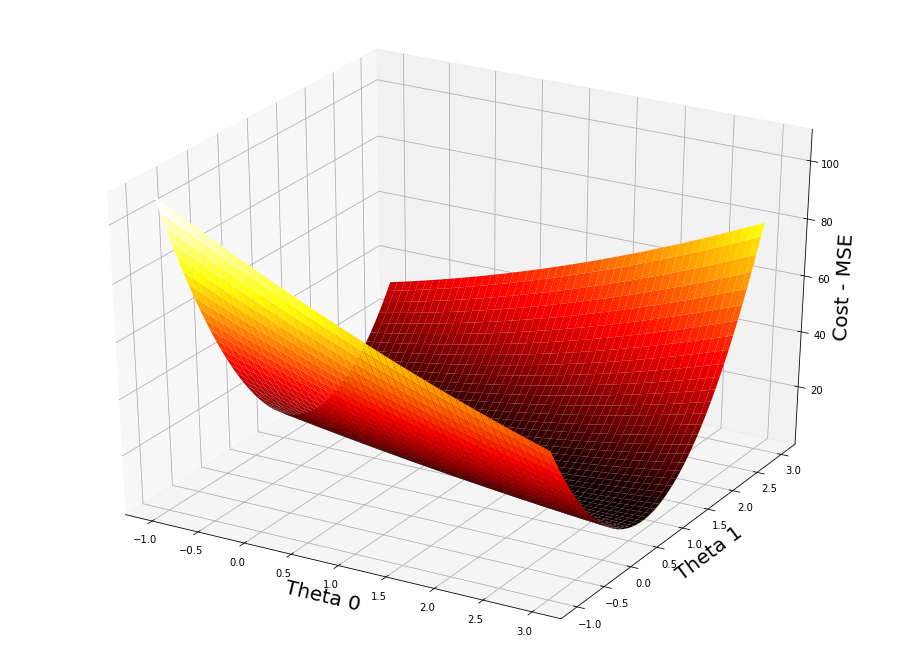

In [92]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [76]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(),shape=plot_cost.shape) #use shape arg inst of dims, depricated 
print('Min occurs at (i, j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91]) 

Min value of plot_cost 0.9483826526747164
Min occurs at (i, j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$
## $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^n \big(y^{(i)} - \theta_0 - \theta_1x^{(i)} \big)$$
## $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^n \big(y^{(i)} - \theta_0 - \theta_1x^{(i)} \big)\big(x^{(i)}\big)$$

## MSE & Gradient Descent

In [95]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    # Create theta0_slope and theta1_slope
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [115]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    # print('x:',x_5 )
    # print('y:',y_5 )
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    #print('Thetas: ',thetas)
        
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
# REsults
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))
#print('Plot: ',plot_vals)
#print(thetas)

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


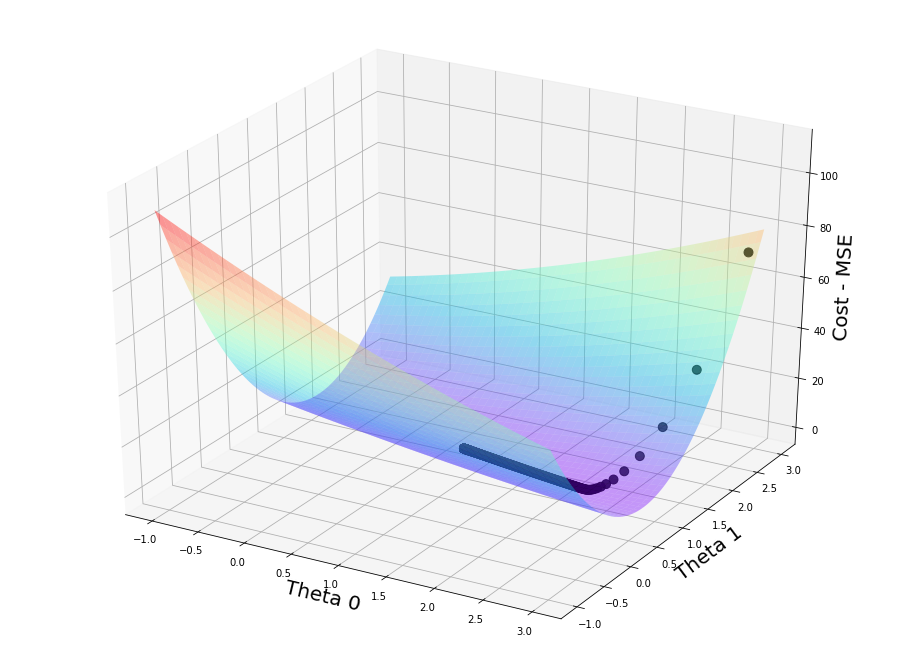

In [121]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()